# 19. Likelihood(MLE와 MAP)

-----------------
### 목차

1. 들어가며: 머신러닝의 목표
2. 확률 변수로서의 모델 파라미터
3. posterior와 prior, likelihood 사이의 관계
4. likelihood와 머신러닝
5. likelihood 감 잡기
6. MLE: 최대 가능도 추론
7. MLE 최적해 구하기
8. MAP: 최대 사후 확률 추정
9. MLE와 MAP의 비교

-------------------



## 19-3. posterior와 prior, likelihood 사이의 관계

### 사전 확률, 가능도, 사후 확률(prior, likelihood, posterior)

데이터 $X$가 주어졌을 때, 데이터가 따르는 확률 분포$P(X)$를 잘 나타내는 일차함수 모델$y=ax+b=\theta^T\bf{x}$를 찾아야 한다.

$$\theta =\left[\begin{array}{c}a\\b\end{array}\right], \quad\bf{x}=\left[\begin{array}{c}x\\1\end{array}\right]$$

* 여기서 데이터를 관찰하기 전 파라미터 공간에 주어진 확률 분포$P(\theta)$를 **prior(prior probability, 사전 확률)**이라고 한다.  
* 주어진 파라미터 분포에 대해서 가지고 있는 데이터가 얼마나 '그럴듯한지'를 나타내는 것이 **likelihood(가능도, 우도)**이다.
$$P(X=x|\theta),\quad\mathcal{L}(\theta|x) $$
  + 데이터들의 likelihood 값을 최대화하는 방향으로 학습시키는 방법을 **최대 가능도 추정(maximum likelihood estimation,MSE)**라고 한다.

* 데이터 집합$X$가 주어졌을 때 파라미터 $\theta$의 분포$P(\theta|X)$는 **posterior(posterior probability, 사후 확률)**라고 한다.
  + posterior를 최대화하는 방향으로 학습시키는 방법을 **최대 사후 확률 추정(maximum a posteriori estimation, MAP)**이라고 한다.

### Posterio, Prior, Likelihood 사이의 관계

확률의 곱셈 정리에 의해 확률 변수$X$와 $\theta$의 joint probability는 다음과 같다.
$$P(X,\theta)=P(\theta|X)P(X)=P(X|\theta)P(\theta)

* 위 식에서 **베이즈 정리(Byes' theorem)** 식이 나온다.
$$P(\theta|X)=\frac{P(X|\theta)P(\theta)}{P(X)}$$
$$\left( \text{posterior}=\frac{\text{likelihood}\times \text{prior}}{\text{evidence}}\right)$$

## 19-4. likelihood와 머신러닝

입력 데이터의 집합을 $X$, 라벨들의 집합을 $Y$라고 할 때, Likelihood는 파라미터와 입력 데이터가 주어졌을 때 출력값의 확률 분포, 즉 $P(Y|\theta,X)$이다.

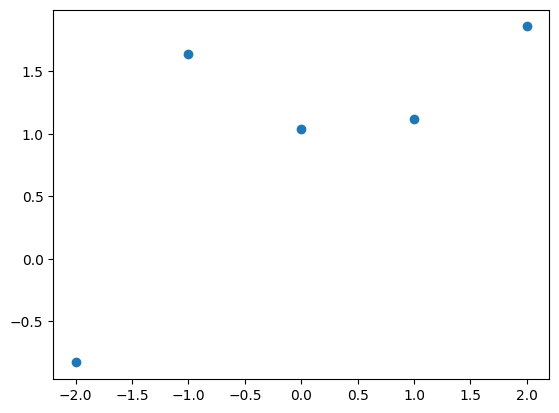

In [ ]:
# 5개의 랜덤한 포인트
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

input_data = np.linspace(-2,2,5)
label = input_data + 1 + np.random.normal(0,1,size=5)

plt.scatter(input_data, label)
plt.show()

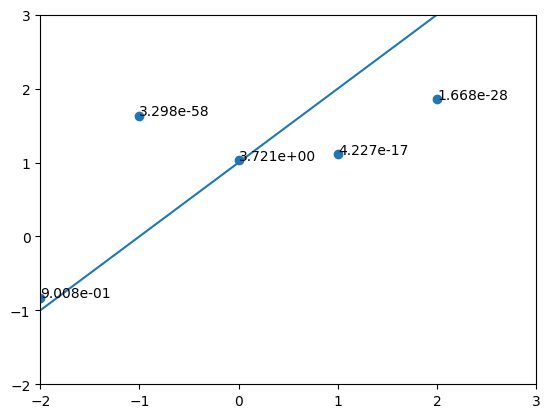

In [ ]:
# model: y = ax + b

# [Playground] a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 1
b = 1
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력 데이터, y: 데이터 라벨
# 예측값과 라벨의 차이를 제곱하여 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)
plt.xlim([-2, 3]) 
plt.ylim([-2, 3]) 
for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

## 19-6. MLE: 최대 가능도 추론

가지고 있는 데이터 포인트들이 서로 독립이고 같은 확률 분포를 따른다고 가정한다.(이러한 가정을 independent and identically distributed; i.i.d.라고 한다.)   
데이터셋 전체의 likelihood$P(Y|\theta,X)$는 데이터 포인트 각각의 likelihood를 모두 곱한 값과 같다.
$$P(Y|\theta,X)=\prod_n P(y_n|\theta,x_n)$$

실제 MLE를 적용할 때는 미분 계산이 쉬워지도록 log를 씌운다.   

따라서 likelihood를 최대화 하는 파라미터는 다음과 같다.
$$\theta_{ML}=(X^TX)^{-1}X^Ty$$

## 19-7. MLE 최적해 구하기

1. $y=x+1$함수르 기준으로 평균이 0이고 표준편차가 0.5인 랜덤한 노이즈를 섞은 20개의 데이터를 설정,


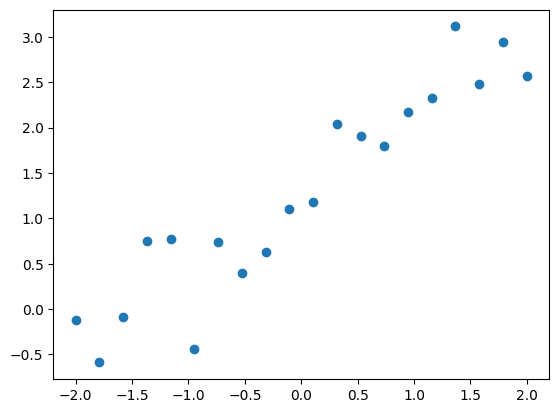

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 20

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

plt.scatter(input_data, labels)
plt.show()

2. **Likelihood**
$$P(Y|\theta,X)=\prod_n\frac{1}{\sqrt{2\pi\sigma^2}}exp\left( -\frac{(y_n-\theta^T \bf{x}_n)^2}{2\sigma^2}\right)$$   
3. **Negative log likelihood**
$$-logP(Y|\theta,X)\left( \sum_n log\frac{1}{\sqrt{2\pi\sigma^2}}+\frac{1}{s\sigma^2}\sum_n(-(y_n-\theta^T\bf{x}_n))^2\right)$$
4. **MLE의 최적 파라미터**
$$\theta_{ML}=(X^TX)^{-1}X^Ty$$

In [ ]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

slope: 0.8578 bias: 1.2847
likelihood: 2.9724e-54
negative log likelihood: 1.2325e+02


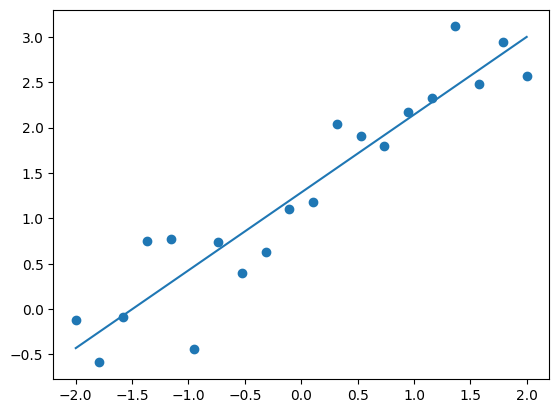

In [ ]:
# X: 20x2 matrix, y: 20x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples, 1)), axis=1)
y = labels

theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

print('slope: '+'%.4f'%theta_1+' bias: '+'%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood: '+'%.4e'%likelihood(labels, predictions))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, predictions))

model_x = np.linspace(-2, 2, 50)
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, model_y)
plt.show()

## 19-8. MAP: 최대 사후 확률 추정

* MLE는 관측된 데이터 값에만 의존
*  **최대 사후 확률 추정 (maximum a posteriori estimation, MAP)**은 데이터셋이 주어졌을 때 파라미터의 분포, 즉$p(θ∣X)$에서 확률 값을 최대화하는 파라미터 $θ$를 찾는다.

지도 학습의 경우 posterior은 $P(\theta|X,Y)$로 나타나고, prior$P(\theta)$와 likelihood$P(Y|\theta,X)$에 관한 식으로 나타내면 다음과 같다.

$$P(\theta|X,Y)=\frac{P(Y|\theta,X)P(\theta)}{P(Y|X)}$$

여기서 $P(\theta)$는 관찰된 데이터가 없을 때의 확률 분포이다. 이를 평균이 $(0,0)$이고 공분산이 $\sum=\alpha^2\bf{I}$인 정규분포로 정의한다.
$$P(\theta)=\mathcal{N}(\bf{0},\alpha^2\bf{I})=\frac{1}{2\pi\alpha^2}exp\left(-\frac{1}{2\pi\alpha^2}\theta^T\theta\right)$$

  + negative log posterior를 최소화하는 파라미터 값
  $$\theta_{MAP}=\left( X^TX+\frac{\sigma^2}{\alpha^2}\bf{I}\right)^{-1}X^Ty$$


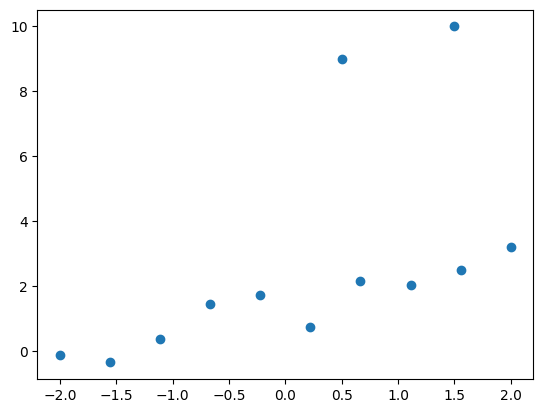

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 10

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

input_data = np.append(input_data, [0.5, 1.5])
labels = np.append(labels, [9.0, 10.0])

plt.scatter(input_data, labels)
plt.show()

def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03


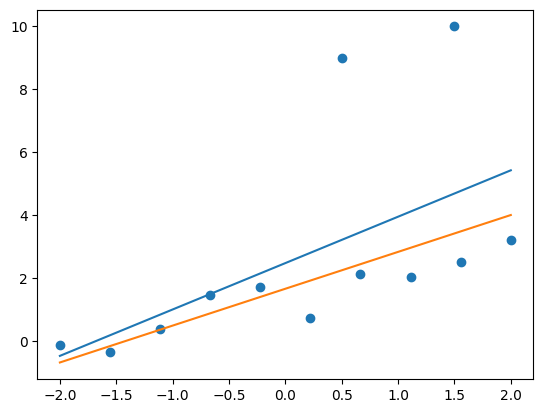

In [ ]:
# X: 21x2 matrix, y: 21x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples+2, 1)), axis=1)
y = labels

# MLE 파라미터 계산식
mle_theta_1, mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# MAP 파라미터 계산식
map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+(0.1*0.1)/(0.04*0.04)*np.eye(2)), X.T), y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1+' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels, mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1+' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, map_preds))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, map_preds))

model_x = np.linspace(-2, 2, 50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, mle_model_y)
plt.plot(model_x, map_model_y)
plt.show()
